
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Assignment 1 - The Reinforcement Learning Framework</b></center></h2>

<br>
<center><font size="3">This notebook is a part of teaching material for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2024 - Nov 30, 2024</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Introduction </a>
* <a href='#1.1'> 1.1 Learning Objectives </a>
* <a href='#1.2'> 1.2 Code Structure & Files </a>
* <a href='#2.'> 2. Cartpole</a>
* <a href='#3.'> 3. Reacher</a>
* <a href='#4.'> 4. Submitting </a>
* <a href='#4.1'> 4.1 Feedback </a>
* <a href='#5.'> References</a>

<a href='#T1'><b>Student Task 1.</b> Training a Model for Simple Cartpole Environment (10 points)</a>\
<a href='#Q1'><b>Student Question 1.1</b> Learning (10 points)</a>\
<a href='#T2'><b>Student Task 2.</b> Investigating Training Performance (10 points) </a>\
<a href='#Q2'><b>Student Question 2.1</b> Analysis of Training Performance (15 points) </a>\
<a href='#Q3'><b>Student Question 2.2</b> Stochasticity (10 points) </a>\
<a href='#T3'><b>Student Task 3.</b> Reward Functions (20 points) </a>\
<a href='#T4'><b>Student Task 4.</b> Visualizing Behavior (10 points) </a>\
<a href='#Q4'><b>Student Question 4.1</b> Achieved Peformance (5 points)\
<a href='#Q5'><b>Student Question 4.2</b> Analysis of Behaviour (10 points)</a>
    
**Total Points:** 100

**Estimated runtime of all the cells:** 30 minutes 

# 1. Introduction <a id='1.'></a>
In this exercise we will take a first look at a reinforcement learning environment, its components and modify the reward function of a simple agent.

In this notebook two environments are used: Cartpole and Reacher. The cartpole environment is taken from [OpenAI's Gym library](https://www.gymlibrary.dev/). The reacher environment is custom made (and defined in ```reacher.py```) but utilizes the Gym API.

## 1.1 Learning Objectives: <a id='1.1'></a>
- To become familiar with assignment structure and the agent-environment relationshp
- To understand the effects of stochasticity
- To understand and explore the effects of task definition

## 1.2 Code Structure & Files <a id='1.2'></a>

The ```train.py``` file instantiates the environment and the RL agent that acts in it. The ```agent.py``` file contains the implementation of a simple reinforcement learning agent; for the sake of this exercise, you can assume it to be a black box (you don’t need to understand how it works, although you are encouraged to study it in more detail). You don’t have to edit any other file other than ```ex1.ipynb``` to complete this exercise.
```
├───cfg                  # Config files for environments e.g. define the maximum number of steps in an episode.
├───imgs                 # Images used in notebook
├───results 
│   ├───logging          # Contains logged data
│   ├───model            # Contains the policies learned
│   └───video            # Contains videos for each environment
│       └───CartPole-v0
│       │  └───test      # Videos saved during testing
│       │  └───train     # Videos saved during training
│       └───SpinningReacher-v0
│           └───test
│           └───train
│   ex1.ipynb            # Main assignment file containing tasks <---------
│   feedback.ipynb       # Please give feedback in here
│   README.ipynb         # This file
│   agent.py             # Contains functions that govern the policy
│   reacher.py           # Defines the reacher environment
│   train.py             # Contains training and testing functions
│   utils.py             # Contains useful functions 
```

Please consult ```README.md``` for more details the assignments.

## Warnings:

- Don’t copy and paste cells within a notebook. This will mess up the tracking metadata and prevent autograding from working.
- Only add new cells using the '+' button in the upper toolbar and do not split cells.
- Be cautious about things such as copying the whole notebook to Colab to work on it. This has sometimes resulted in removing all notebook metadata, making autograding impossible.

In [1]:
skip_training = True  # Set this flag to True before validation and submission

In [2]:
from pathlib import Path # to find directory
work_dir = Path().cwd()/'results'
import os

import train as t # for training
import utils as u # helper functions

import numpy as np # The numpy library can be used for math functions
import torch # Used to manage policy and learning
from IPython.display import Video, display, HTML # to display videos

# 2. Cartpole <a id='2.'></a>

The Cartpole environment consists of a cart and a pole mounted on top of it, as shown in Figure 1. The cart can move either to the left or to the right. The goal is to balance the pole in a vertical position in order to prevent it from falling down. The cart should also stay within limited distance from the center (trying to move outside screen boundaries is considered a failure).

<figure>
<img src="imgs/cartpole.png" width="400px">
<figcaption style="text-align: center"> Figure 1: The Cartpole environment  </figcaption>
</figure>

The state and the observation are four element vectors:

$$
o=s=\left(\begin{array}{c}
x \\
\dot{x} \\
\theta \\
\dot{\theta}
\end{array}\right) \text {, }
$$

where $x$ is the position of the cart, $\dot{x}$ is its velocity, $\theta$ is the angle of the pole w.r.t. the vertical axis, and $\dot{\theta}$ is the angular velocity of the pole.

In the standard formulation, a reward of 1 is given for every timestep the pole remains balanced. Upon failing (the pole falls) or completing the task, an episode is finished.

The training script will record videos of the agent’s learning progress during training, and the recorded videos are saved to ```results/video/CartPole-v0/train```. By default, the training information is saved to ```results/logging/CartPole-v0_{seed}.csv```. When the training is finished, the models are saved to ```results/model/Cartpole-v0_params.pt```. Videos of the agent’s behaviour during testing are saved to ```results/video/CartPole-v0/test```.

<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1.</b> Training a Model for Simple Cartpole Environment (10 points) </h3> 

This task requires you to train a model for the cartpole environment with 100 timesteps per episode. Then test the model for 500 timesteps and report average reward. To do this, you can simply run the code in the cells below. 

To see a full list of options that can be passed through ```cfg_args``` consult the configuation file found in ```cfg/```.

- **1st** Run training over 100 steps per episode by using ```t.train``` function. See the cell below. The training will run for 500 episodes automatically.
- **2nd:** Export the training plot ```episodesep_reward``` from logged data (.csv format).
- **3rd:** Run testing over 500 steps by using ```t.test``` function. See the cell below. See the cell below. Notice ```max_episode_steps``` parameter. 
- **4th:** **Manually** report the average reward after the cells have completed execution.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [3]:
if not skip_training:
    t.train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=dict(seed=1, max_episode_steps=100, model_name="CartPole-v1")) # < 5 mins

In [4]:
if not skip_training:
    u.plot_reward(Path().cwd()/'results'/'logging'/'CartPole-v1_1.csv', 'CartPole')

The command below will evaluate the trained model in 10 episodes and report the average reward (and episode length) for these 10 episodes. Do not delete the cell below as it is used for grading.

In [5]:
%%capture --no-stdout
assert t.test(episodes=10, cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
        cfg_args=dict(testing=True, save_video=(not skip_training), save_model=False, seed=None, max_episode_steps=500,model_name="CartPole-v1")) > 100

Numpy/Torch/Random Seed:  478
Loading model from /notebooks/rl2024/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 128.0 seed: 675
Test ep reward: 149.0 seed: 336
Test ep reward: 131.0 seed: 904
Test ep reward: 126.0 seed: 935
Test ep reward: 137.0 seed: 641
Test ep reward: 130.0 seed: 552
Test ep reward: 136.0 seed: 615
Test ep reward: 131.0 seed: 911
Test ep reward: 119.0 seed: 910
Test ep reward: 136.0 seed: 305
Average test reward: 132.3 episode length: 132.3


Report below the average reward after testing the model

132.3

The agent acting in the environment can be seen using the following command. Change the ```path``` to pick the episode you want to visualize. Bear in mind by default video saving for training is taken every 50 episodes.

In [6]:
if not skip_training:
    # Train Result
    video_dir = work_dir/'video'/'CartPole-v1'/'train'
    
    # List all MP4 files in the directory
    mp4_files = [file for file in os.listdir(video_dir) if file.endswith(".mp4")]
    frame_colors = ['#FF5733', '#33FF57', '#5733FF', '#FFFF33', '#33FFFF', '#FF33FF']
    # Display each MP4 file
    for i, mp4_file in enumerate(mp4_files):
        video_path = os.path.join(video_dir, mp4_file)
        video = Video(video_path, embed=True, html_attributes="loop autoplay", width=200, height=100)
        frame_color = frame_colors[i % len(frame_colors)]
        video_frame = HTML(f'<div style="width: 200px; height: 100px;; border: 1px solid #FF5733;">{video._repr_html_()}</div>')
        print("test/",mp4_file)
        display(video_frame)

In [7]:
if not skip_training:
    # Test Result
    
    video_dir = work_dir/'video'/'CartPole-v1'/'test'
    
    # List all MP4 files in the directory
    mp4_files = [file for file in os.listdir(video_dir) if file.endswith(".mp4")]
    frame_colors = ['#FF5733', '#33FF57', '#5733FF', '#FFFF33', '#33FFFF', '#FF33FF']
    # Display each MP4 file
    for i, mp4_file in enumerate(mp4_files):
        video_path = os.path.join(video_dir, mp4_file)
        video = Video(video_path, embed=True, html_attributes="loop autoplay", width=200, height=100)
        frame_color = frame_colors[i % len(frame_colors)]
        video_frame = HTML(f'<div style="width: 200px; height: 100px;; border: 1px solid #5733FF;">{video._repr_html_()}</div>')
        print("test/",mp4_file)
        display(video_frame)

<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.1</b> Learning (10 points) </h3> 

Test the trained model from Task 1 five times with different random seeds. Did the same model, trained to balance for 100 timesteps, learn to always balance the pole for 1000 timesteps? Why/why not?
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [8]:
#Evaluate the trained model by setting 5 different random seeds chosen by you
#Type 5 different  random seeds  in eval_seeds array
eval_seeds =  [1, 2, 3, 4, 5]

In [9]:
assert len(set(eval_seeds)) == 5

In [10]:
%%capture --no-stdout
def question1_1_evaluate1(eval_seeds):
    mean_reward = []

    for seed in eval_seeds:
        acc_rewards = t.test(episodes=1, cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
            cfg_args=dict(testing=True,save_video=False, save_logging=False, save_model=False, 
            seed=seed, max_episode_steps=1000, model_name="CartPole-v1"))
        mean_reward.append(acc_rewards)

    return np.mean(mean_reward)

assert question1_1_evaluate1(eval_seeds) > 100

Numpy/Torch/Random Seed:  1
Loading model from /notebooks/rl2024/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 127.0 seed: 1
Average test reward: 127.0 episode length: 127.0
Numpy/Torch/Random Seed:  2
Loading model from /notebooks/rl2024/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 135.0 seed: 2
Average test reward: 135.0 episode length: 135.0
Numpy/Torch/Random Seed:  3
Loading model from /notebooks/rl2024/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 131.0 seed: 3
Average test reward: 131.0 episode length: 131.0
Numpy/Torch/Random Seed:  4
Loading model from /notebooks/rl2024/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 148.0 seed: 4
Average test reward: 148.0 episode length: 148.0
Numpy/Torch/Random Seed:  5
Loading model from /notebooks/rl2024/ex1/results/model/CartPole-v1_params.pt ...
Testing...
Test ep reward: 138.0 seed: 5
Average test reward: 138.0 episode length: 138.0


### Question:
Did the same model consistently balance the pole for 1000 timesteps? Select the most appropriate answer.

**Options:**
Choices:
1. No, the agent generally failed around 100-200 timesteps because it encountered unfamiliar states.

2. Yes, the agent balanced the pole for 1000 timesteps in every test due to a perfectly learned policy.

3. No, although the agent sometimes balanced the pole for 1000 timesteps, it typically failed due to limited generalization to new states.

4. Yes, but only with some random seeds; it failed to generalize this behavior across all tests.

5. No, the agent frequently moved out of bounds or the pole tilted too much, showing poor adaptation.

6. Yes, the agent demonstrated perfect control in all tests due to effective training.

7. No, the agent's performance varied significantly with different random seeds, indicating inconsistency in learned behavior.




In [11]:
sq1_1 = 5 #Answer question 1.1 with the appropriate answer number

In [12]:
assert sq1_1 in range(1,8)

The following cells are used for grading

<a id='T2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 2.</b> Investigating Training Performance (10 points) </h3> 

Repeat the experiment in Task 1 five times, each time training the model from scratch with 100 timesteps and testing it for 1000 timesteps. Use a different seed number for each training/testing cycle. You can use the box below to write a small script to do this. Use the result textbox below to report the average test reward for each repeat. 
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Make sure to change the model_name for each agent to the ones given and and that the respective parameter file is saved in results/model/

In order to get the points for this exercise each of the agents must have a test accuracy of higher than 100.

In [13]:
# %%capture
# uncomment if you want to skip the output

if not skip_training:
    model_names = ["CartPole-v1-model0", "CartPole-v1-model1", "CartPole-v1-model2", "CartPole-v1-model3", "CartPole-v1-model4"]
    model_seeds = [10, 20, 30, 40, 50]

    assert len(set(model_seeds)) == 5
    '''
    TODO: Repeat the experiment in Task 1 five times
    '''
    ########## Your code starts here ##########
    for name, seed in zip(model_names, model_seeds):
        t.train(cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', cfg_args=dict(seed=seed, max_episode_steps=100, model_name=name))
    ########## Your code ends here ##########



Do not delete the cell below as it is used for grading.

In [14]:
%%capture --no-stdout
test_seeds = [700, 800, 900, 1000, 2000]

for i in range(5):
    for seed in test_seeds:
        assert t.test(episodes=1, cfg_path=Path().cwd()/'cfg'/'cartpole_v1.yaml', 
            cfg_args=dict(testing=True, seed=seed,save_video=False, save_logging=False, 
            save_model=False, max_episode_steps=1000, model_name=str("CartPole-v1-model"+str(i)))) > 100



Numpy/Torch/Random Seed:  700
Loading model from /notebooks/rl2024/ex1/results/model/CartPole-v1-model0_params.pt ...
Testing...
Test ep reward: 115.0 seed: 700
Average test reward: 115.0 episode length: 115.0
Numpy/Torch/Random Seed:  800
Loading model from /notebooks/rl2024/ex1/results/model/CartPole-v1-model0_params.pt ...
Testing...
Test ep reward: 122.0 seed: 800
Average test reward: 122.0 episode length: 122.0
Numpy/Torch/Random Seed:  900
Loading model from /notebooks/rl2024/ex1/results/model/CartPole-v1-model0_params.pt ...
Testing...
Test ep reward: 118.0 seed: 900
Average test reward: 118.0 episode length: 118.0
Numpy/Torch/Random Seed:  1000
Loading model from /notebooks/rl2024/ex1/results/model/CartPole-v1-model0_params.pt ...
Testing...
Test ep reward: 121.0 seed: 1000
Average test reward: 121.0 episode length: 121.0
Numpy/Torch/Random Seed:  2000
Loading model from /notebooks/rl2024/ex1/results/model/CartPole-v1-model0_params.pt ...
Testing...
Test ep reward: 125.0 seed: 

- Model 0:
    - Seed: 700, Test Reward: 115
    - Seed: 800, Test Reward: 122
    - Seed: 900, Test Reward: 118
    - Seed: 1000, Test Reward: 121
    - Seed: 2000, Test Reward: 125
    - Average: 120.2
- Model 1:
    - Seed: 700, Test Reward: 141
    - Seed: 800, Test Reward: 129
    - Seed: 900, Test Reward: 132
    - Seed: 1000, Test Reward: 133
    - Seed: 2000, Test Reward: 123
    - Average: 131.6
- Model 2:
    - Seed: 700, Test Reward: 133
    - Seed: 800, Test Reward: 123
    - Seed: 900, Test Reward: 127
    - Seed: 1000, Test Reward: 126
    - Seed: 2000, Test Reward: 120
    - Average: 125.8
- Model 3:
    - Seed: 700, Test Reward: 202
    - Seed: 800, Test Reward: 211
    - Seed: 900, Test Reward: 207
    - Seed: 1000, Test Reward: 202
    - Seed: 2000, Test Reward: 210
    - Average: 206.4
- Model 4:
    - Seed: 700, Test Reward: 263
    - Seed: 800, Test Reward: 381
    - Seed: 900, Test Reward: 405
    - Seed: 1000, Test Reward: 694
    - Seed: 2000, Test Reward: 249
    - Average: 398.4

<a id='Q2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.1</b> Analysis of Training Performance (15 points) </h3> 

Are the behavior and performance of the trained models the same every time? Why/why not? Analyze the causes briefly. Hint: the random seed initializes the weights and the environment settings randomly.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Select all the correct answers. You can select no more than 6 answers, otherwise you lose all exercise points.

1. Yes, because the model has been optimized to always reach the highest possible reward regardless of random seeds or initial conditions.

2. No, because the training dynamics and the evaluating dynamics are not the same

3. No, because the trained model has stochastic behaviour which may perform differently in different environments

4. No, the behaviour and performance are not the same, as shown by the different average rewards in previous Task. 

5. No, because there’s a lot of stochasticity involved in the training process

6. No, because agent explores with random actions during training

7. No, because policy is initially randomly initialised with random weights, gradient updates of the policy are noisy. 

8. No, because the environment may be stochastic: agent is randomly initialised in beginning of each episode, (transitions from one state to next one may follow a probability distribution)

9. Yes, all machine learning models perform consistently after training due to the deterministic nature of their algorithms.

In [15]:
sq2_1 = [3, 4, 7, 8] #Answer question 2.1 with the appropriate answer numbers

In [16]:
assert 1 <= len(set(sq2_1)) <= 6
assert set(sq2_1) < set(range(1, 10))

Do not remove the following blocks as they are used for grading

<a id='Q3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.2</b> Stochasticity (10 points) </h3> 

What are the implications of this stochasticity, when it comes to comparing reinforcement learning algorithms to each other? Please explain.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Select the correct answer

1. It is only necessary to compare the maximum rewards achieved by each algorithm to determine the best one.

2. Stochasticity requires that algorithms be trained and evaluated multiple times to obtain a reliable estimate of performance, including measures of variance besides the average reward.

3. Algorithms should be trained once under identical conditions to ensure a fair comparison, focusing on the consistency of the training process.

4. The best approach is to evaluate algorithms based on their performance in a single, well-designed test to avoid the confounding effects of random variability.

5. To effectively compare algorithms, one should calculate the median reward from multiple trials, as this is the most robust measure against outliers.


In [17]:
sq2_2 = 2 #Answer question 2.2 with the appropriate answer number

In [18]:
assert sq2_2 in range(1,6)

Stochasticity leads to variation in performance across different runs. To fairly compare algorithms, it is necessary to train and evaluate them multiple times and consider not just the average reward but also measures of variance, e.g. standard deviation, to measure the algorithm's performance fairly.

The following cells are used for grading

# Reacher <a id='3.'></a>

Now we will focus on designing a reward function for a different environment, the Reacher environment, where a two-joint manipulator needs to reach a goal (see Figure 2).

<figure>
<img src="imgs/reacher.png" width="200px">
<figcaption style="text-align: center"> Figure 2: The Reacher environment  </figcaption>
</figure>

The Cartesian ($x$, $y$) position of the end-effector of the manipulator can be determined following the equation:

$$
 x = L_1 \sin(\theta_0)+L_2 \sin(\theta_0+\theta_1)\\
 y = -L_1 \cos(\theta_0)-L_2 \cos(\theta_0+\theta_1)
$$

where $L1 = 1$, $L2 = 1$ are the lengths, and $\theta_0$, $\theta_1$ the joint angles of the first and second links respectively. The state (and observation) in this environment is the two element vector:

$$
o=s=\left(\begin{array}{c}
\theta_0 \\
\theta_1 \\
\end{array}\right) \text {, }
$$

The action space now consists of 5 "options"; 4 correspond rotating the first/second joint left/right, and the final one performs no motion at all (the configuration doesn’t change). The episode terminates when the agent reaches the target position, marked in red. Now, let us design a custom reward function and use it for training the RL agent.

<a id='T3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 3.</b> Reward Functions (20 points) </h3> 

Below two classes are shown that modify the reward function of the reacher function provided in ```reacher.py```. Edit the function ```get_reward``` _below_ (not in ```reacher.py```) in both classes. For each class, write a reward function to incentivise the agent to learn the following behaviors:

Class 1) ```SpinningReacherEnv```: Keep the manipulator rotating clockwise continuously (w.r.t. angle θ_0). You can use a lower number of training episodes for this, e.g. train(cfg_args=dict(env_name='SpinningReacher-v0', train_episodes=200), overrides=['env=reacher_v1'])

Class 2) ```TargetReacherEnv```: Reach the goal point located in x = [1.0,1.0] (marked in red). Use at least 500 training episodes.
    
Train one model for each behavior. 

**Hint:** Use the observation vector to get the quantities required to compute the new reward (such as the position of the manipulator). You can get the Cartesian position of the end-effector with ```self.get_cartesian_pos(state)```.
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [19]:
from reacher import ReacherEnv
from typing import Optional
from gymnasium.envs.registration import register

class SpinningReacherEnv(ReacherEnv):
    def __init__(self, render_mode: Optional[str] = None, max_episode_steps=200):
        super().__init__(render_mode=render_mode, max_episode_steps=max_episode_steps)
        
    def get_reward(self, prev_state, action, next_state):
        '''
        TODO: Task 3: Implement and test the first reward function
        '''        
        ########## Your code starts here ##########
        if next_state[0] < prev_state[0]:
            return 1
        return 0
        ########## Your codes end here ########## 
        
    
register("SpinningReacher-v0",
        entry_point="%s:SpinningReacherEnv"%__name__,
        max_episode_steps=200)

class TargetReacherEnv(ReacherEnv):
    def __init__(self, render_mode: Optional[str] = None, max_episode_steps=200):
        super().__init__(render_mode=render_mode, max_episode_steps=max_episode_steps)
        
    def get_reward(self, prev_state, action, next_state):
        '''
        # TODO: Task 3: Implement and test the second reward function
        '''
        ########## Your code starts here ##########
        next_pos = self.get_cartesian_pos(next_state)
        return -np.linalg.norm(next_pos - self.goal)
        ########## Your codes end here ########## 
        
register("TargetReacher-v0",
        entry_point="%s:TargetReacherEnv"%__name__,
        max_episode_steps=200)

In [20]:
seeds = [860, 241, 73, 543, 582, 211, 524, 484, 954, 656]

In [21]:
if not skip_training:
      t.train(cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
      cfg_args=dict(env_name='SpinningReacher-v0',model_name='SpinningReacher-v0', train_episodes=200, seed=1)) # < 5 mins

In [22]:
if not skip_training:
    for seed in seeds:
        t.test(episodes=10, cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
        cfg_args=dict(env_name='SpinningReacher-v0',model_name='SpinningReacher-v0', testing=True,seed=seed))

The agent acting in the environment can be seen using the following command. Change the ```path``` to pick the episode you want to visualize. Bear in mind by default video saving for training is taken every 50 episodes.

In [23]:
if not skip_training:
      video = Video(work_dir/'video'/'SpinningReacher-v0'/'test'/f'ex1-episode-1.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
      display(video)

In [24]:
if not skip_training:
      t.train(cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
      cfg_args=dict(env_name='TargetReacher-v0',model_name='TargetReacher-v0', train_episodes=500, seed=1)) # < 5 mins

In [25]:
if not skip_training:
    for seed in seeds:
        t.test(episodes=10, cfg_path=Path().cwd()/'cfg'/'reacher_v1.yaml', 
        cfg_args=dict(env_name='TargetReacher-v0',model_name='TargetReacher-v0', seed=seed, testing=True,))

In [26]:
if not skip_training:
      video = Video(work_dir/'video'/'TargetReacher-v0'/'test'/f'ex1-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
      display(video)

Do not delete the following cells as they are used for grading. Make sure to test that both agents work correctly for the selected set of seeds [860, 241, 73, 543, 582, 211, 524, 484, 954, 656].

In [27]:
%%capture --no-stdout
"TEST CELL"

In [28]:
%%capture --no-stdout
"TEST CELL"

<a id='T4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 4.</b> Visualizing Behavior (10 points) </h3> 

Now, let us visualize the reward function for the second behavior (reaching the goal [1,1]). Plot the values of the second reward function from Task 3 and the learned best action as a function of the state (the joint positions). Use the code below as a starting point. After plotting, answer the questions below.
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import gymnasium as gym
from agent import Agent, Policy

In [30]:
env_name = "TargetReacher-v0" 
resolution = 101  # Resolution of the policy/reward image

# Load policy from default path to plot
policy_dir = Path().cwd()/'results'/'model'/f'{env_name}_params.pt'

sns.set()

# Create a gym environment
env = gym.make(env_name)

action_space_dim = u.get_space_dim(env.action_space)
observation_space_dim = u.get_space_dim(env.observation_space)
policy = Policy(observation_space_dim, action_space_dim)

if policy_dir:
    policy.load_state_dict(torch.load(policy_dir))
    print("Loading policy from", policy_dir)
else:
    print("Plotting a random policy")

Loading policy from /notebooks/rl2024/ex1/results/model/TargetReacher-v0_params.pt


In [31]:
# Create a grid and initialize arrays to store rewards and actions
npoints = resolution
state_range = np.linspace(-np.pi, np.pi, npoints)
rewards = np.zeros((npoints, npoints))
actions = np.zeros((npoints, npoints), dtype=np.int32)

# Init target reacher for reward calculations
reacher = TargetReacherEnv()

# Loop through state[0] and state[1]
for i,th1 in enumerate(state_range):
    for j,th2 in enumerate(state_range):
        # Create the state vector from th1, th2
        state = np.array([th1, th2])

        # Query the policy and find the most probable action
        with torch.no_grad():
            action_dist, _ = policy(torch.from_numpy(state).float().unsqueeze(0))
        action_probs = action_dist.probs.numpy() # Shape (1, 5)

        '''
        # TODO: Task 4: 
        # 1. What's the best action, according to the policy?
        # 2. Compute the reward given state
        '''
        ########## Your code starts here ##########
        # Use the action probabilities in the action_probs vector
        # (it's a numpy array)
        
        idx = np.argmax(action_probs)
        actions[i, j] = idx
        
        rewards[i,j] = reacher.get_reward(None, idx, state)
        ########## Your code ends here ##########


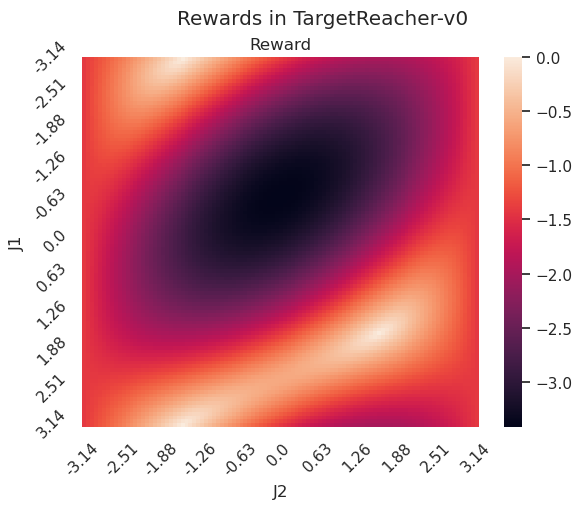

In [32]:
# Create the reward plot
num_ticks = 10
tick_skip = max(1, npoints // num_ticks)
tick_shift = 2*np.pi/npoints/2
tick_points = np.arange(npoints)[::tick_skip] + tick_shift
tick_labels = state_range.round(2)[::tick_skip]

sns.heatmap(rewards)
plt.xticks(tick_points, tick_labels, rotation=45)
plt.yticks(tick_points, tick_labels, rotation=45)
plt.xlabel("J2")
plt.ylabel("J1")
plt.title("Reward")
plt.suptitle("Rewards in %s" % env_name)
plt.show()


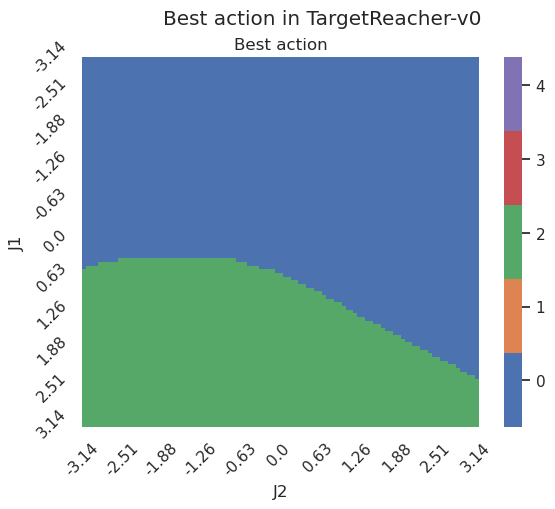

In [33]:
# # Create the policy plot
cmap = sns.color_palette("deep", action_space_dim)
sns.heatmap(actions, cmap=cmap, vmin=0, vmax=action_space_dim-1)
plt.xticks(tick_points, tick_labels, rotation=45)
plt.yticks(tick_points, tick_labels, rotation=45)
colorbar = plt.gca().collections[0].colorbar
ticks = np.array(range(action_space_dim))*((action_space_dim-1)/action_space_dim)+0.5
colorbar.set_ticks(ticks)
if env.spec.id == "Reacher-v1":
    # In Reacher, we can replace 0..4 with more readable labels
    labels = ["J1+", "J1-", "J2+", "J2-", "Stop"]
else:
    labels = list(map(str, range(action_space_dim)))
colorbar.set_ticklabels(labels)
plt.xlabel("J2")
plt.ylabel("J1")
plt.title("Best action")
plt.suptitle("Best action in %s" % env_name)
plt.show()

Do not remove this cell as it is used for grading

<a id='Q4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.1</b> Achieved Performance (5 points) </h3> 

Where are the highest and lowest reward achieved?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


The reward is the negative of the distance of the end of the manipulator to the goal. So, following from that, the highest rewards are near the goal, \
and the lowest rewards are the furthest away from the goal. In the heatmap, the rewards are plotted wrt. the angles of the double jointed manipulator, \
where the magnitude of the reward is increasing from dark color to light color.

<a id='Q5'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.2</b> Analysis of Behaviour (10 points) </h3> 

Did the policy learn to reach the goal from every possible state (manipulator configuration) in an optimal way (i.e. with lowest possible number of steps)? Why/why not?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Select all the correct answers.You can select no more than 4 answers, otherwise you lose all exercise points:

1. Yes, the policy efficiently learns to reach the goal from every state due to comprehensive state exploration.

2. No, the policy fails to explore all states adequately because the initial and goal states are nearly constant, leading to limited exploration ability.

3. Yes, the model is trained to always find the shortest path due to advanced algorithmic efficiency.

4. No, because the policy often chooses longer paths for certain initial states , not exploiting shorter alternatives.

5. Yes, continuous training ensures the policy adapts to find the best route from any state over time.

6. No, optimal paths are not always found because the exploration phase is limited, causing repeated suboptimal actions.

7. No, the policy sometimes achieves the goal optimally, but not consistently across all trials and configurations.

8. Yes, the training regime guarantees that all possible configurations are optimally addressed by the final model.

9. No, the policy cannot reach from all state because the policy has stochastic behavior.

10. No, bacause the policy overfits to the online it collects.

11. No, bacause the the reward function is not defined in an optimal way for this task.

In [34]:
sq4_2 = [2, 6, 11] #Answer question 4.2 with the appropriate answer numbers

In [35]:
assert 1 <= len(set(sq4_2)) <= 4
assert set(sq4_2) < set(range(1, 12))

Do not remove the following blocks as they are used for grading

# 4. Submitting <a id='4.'></a>
Ensure all tasks and questions (in ```ex1.ipynb```) are answered and the relevant plots are recorded in the relevant places. Details about attaching images and figures can be found below. The relevant graphs to be included for this assignment are:
- Task 1, CartPole ```episodesep_reward``` plot from logged csv file
- x2 Task 4 reward plots

Ensure the correct model files are saved:
- results/model/CartPole-v1_params.pt
- results/model/CartPole-v1-model{0-4}_params.pt
- results/model/SpinningReacher-v0_params.pt
- results/model/TargetReacher-v0_params.pt


In [36]:
# Make sure that skip training is set to True before submission
assert skip_training == True

## 4.1 Feedback <a id='4.1'></a>

In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer to the following questions in your submission:

1) How much time did you spend solving this exercise? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 5.43)


In [37]:
hrs = 5

2) Difficulty of each task/question from 1-5 (int or float)

In [38]:
T1 = 1 # Student Task 1. Training a simple model for Cartpole environment
Q1_1 = 1 # Student Question 1.1 Learning
T2 = 2 # Student Task 2. Investigating training performance
Q2_1 = 4 # Student Question 2.1 Analyzing the training performance
Q2_2 = 3 # Stochasticity
T3 = 2 # Student Task 3. Reward function
T4 = 2 # Student Task 4. Visualize behavior
Q4_1 = 2 # Student Question 4.1 Achieved performance
Q4_2 = 4 # Student Question 4.2 Analysis of behavior

3) How well did you understand the content of the task/question from 1-5? (int or float)


In [39]:
T1 = 5 # Student Task 1. Training a simple model for Cartpole environment
Q1_1 = 5 # Student Question 1.1 Learning
T2 = 5 # Student Task 2. Investigating training performance
Q2_1 = 3 # Student Question 2.1 Analyzing the training performance
Q2_2 = 3 # Stochasticity
T3 = 5 # Student Task 3. Reward function
T4 = 5 # Student Task 4. Visualize behavior
Q4_1 = 4 # Student Question 4.1 Achieved performance
Q4_2 = 3 # Student Question 4.2 Analysis of behavior

4) General feedback. Consider questions like:

    - Did the content of the lecture relate well with the assignment?
    - To what extent did you find the material to be potentially useful for your research and studies?
    
And other feedback you think is worth including. Type in the box below

Please use the following section to record references.
# References <a id='5.'></a>

[1] Sutton, Richard S., and Andrew G. Barto. "Reinforcement Learning: An Introduction (in progress)." London, England (2017). http://incompleteideas.net/book/RLbook2018.pdf